<a href="https://colab.research.google.com/github/gastan81/A-B_testing/blob/main/4_one_sample_t_test_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_1samp

# Hypothesis testing: 1-Sample t-test

In this notebook we'll show you how to calculate a one-sample t-test in two different ways
* Firstly, we'll go through the approach manually. This way you can see the maths and reasoning behind what we're doing - this should help with comprehension and help you to design better experiments.
* Secondly, we'll go through the shorter coding way. The computer will do all the work for you, but won't tell you why. It's quicker and easier, but not great for learning and understanding what's happening

# I. The manual approach
Once upon a time, in a faraway forest, a group of adventurous researchers were determined to uncover the secrets of the local squirrel population. They had heard about the average weight of squirrels being around 1kg, but they wanted to see if their local squirrels were an exception. To embark on this exciting quest, they armed themselves with scales and safety gloves to capture and weigh as many squirrels as they could find!

Just as one of the researchers, like a cheetah on the prowl, darted towards a squirrel nearby, the director of the experiment blared out: "Hold your horses! Retreat to the fortress!" The riddle in her words soon unfurled as she enlightened them on the importance of mapping the treasure hunt – defining the experiment – before plunging into the wild thrills of data collection.

## 1.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

Before diving into the data analysis, they were reminded to avoid bias and data snooping. They knew that they needed to state their Null Hypothesis ($H_0$) and Alternative Hypothesis ($H_A$) before collecting any data.

To account for the possibility of both underweight and overweight squirrels, they decided to conduct a two-tailed test. If they were only interested in underweight squirrels, they would use a left-tailed t-test (a one-tailed t-test). Similarly, if they only cared about overweight squirrels, they would use a right-tailed t-test (also a one-tailed t-test). [Here's a good website](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/) if you wish to explore further about the different tests.


 - Their **Null Hypothesis** was that the mean weight of the local squirrel population was **equal to 1 kg**
 - while their **Alternative Hypothesis** was that it was **not equal to 1 kg**

## 2.&nbsp; Select an appropriate significance level, alpha ($\alpha$).

Before our researchers could look at any data, they also needed to state the significance level (alpha) to prevent data snooping. Alpha denotes the probability of rejecting the Null Hypothesis given that it's true. It's important to choose the right alpha value to be confident in the result and not reject the Null Hypothesis when it should not be rejected. Commonly used values for alpha are 0.1, 0.05 and 0.01. Since they wanted to be very certain about their result, they chose a small alpha value.

In [2]:
alpha = 0.01

## 3.&nbsp; Collect Data that is random and independent

The researchers knew that extreme values don't normally happen in well designed experiments. This is because in a well-designed experiment, the researchers take steps to control variables that may affect the results, ensuring that the data collected is representative of the population being studied. Therefore, any extreme values in the data would be less likely to occur, and any observed differences are more likely to be significant.

Here's the weights of all the squirrels in the sample:

In [3]:
squirrels = pd.Series([1.3, 0.47, 1.5, 1.66, 2.43, 1.29, 0.94, 1.06, 1.03, 0.76, 0.6, 0.76, 0.32, 2.2, 1.24, 1.8, 1.66, 0.51,
                       0.72, 1.62, 0.7, 0.76, 0.9, 0.93, 0.98, 0.42, 0.59, 0.12, 0.95, 0.55, 0.16, 1.25, 0.42, 0.64, 0.66,
                       1.04, 0.49,0.41, 0.4, 0.81, 0.71, 0.04, 0.6, 2.44, 1.61, 0.13, 2.08, 0.7, 0.61, 0.58, 0.77, 0.67, 1.16,
                       0.31, 0.3, 0.66, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02])

Let's quickly look and see what the average weight of the sample is

In [4]:
sample_mean = squirrels.mean()
sample_mean

0.8935483870967743

## 4.&nbsp; Calculate the test result

After an exciting day of collecting data, they huddled together and decided to conduct a super cool hypothesis test. The test would compare the average weight of their sampled squirrels to the commonly accepted average, which would help them determine whether their squirrels were significantly different or just part of the average squirrel crew.

The one-sample t-test is used to compare the mean of a sample to a known or hypothesized population mean. In this case, the researchers wanted to compare the mean weight of their sample to the population mean of squirrel weights. So, they calculated the t-score, also known as a t-value, which represents the number of standard deviations the sample mean is away from the population mean.

$t = \frac{\bar{x} – μ} {\frac{s}{\sqrt{n}}}$

---

$\bar{x}$ = sample mean

μ = known or hypothesized population mean (in this case, what we expect the weight of the squirrels to be, 1kg)

s = sample standard deviation

n = sample size

---

$\bar{x}$ = sample mean

In [5]:
x_bar = squirrels.mean()
x_bar

0.8935483870967743

μ = known or hypothesized population mean (in this case, what we expect the weight of the squirrels to be, 1kg)

In [6]:
mu = 1
mu

1

s = sample standard deviation

In [15]:
s = np.std(squirrels, ddof=1)
s

0.574499345187013

In [8]:
# Alternatively: use pandas to get the standard deviation.
# Note that by default, pandas calculates the sample standard deviation and uses ddof=1.
s_pandas = squirrels.std()
s_pandas

0.574499345187013

n = sample size

In [9]:
n = len(squirrels)
n

62

Calculate the standard error of the mean (SEM):

In [10]:
sem = s / np.sqrt(n)
sem

0.07296148980027692

Calculate the t-score with the values from above

In [ ]:
t_score = (x_bar - mu) / sem
t_score

-1.4590109548835126

### Sampling distributions

The researchers knew that their sample is just one of many possible samples that could be taken from the population of squirrels. Even assuming a perfectly unbiased random sample, chance could have introduced squirrels slightly bigger or smaller.

Fortuantely, they knew about the Central Limit Theorem: with big enough samples, the sampling distribution of sample means is approximately normal. They decided to visualize it so they could have a better idea of the probability their sample had a smaller mean just by chance.

The sampling distribution is centered around the population mean (mu) and its standard deviation is estimated by the standard error of the mean (SEM):

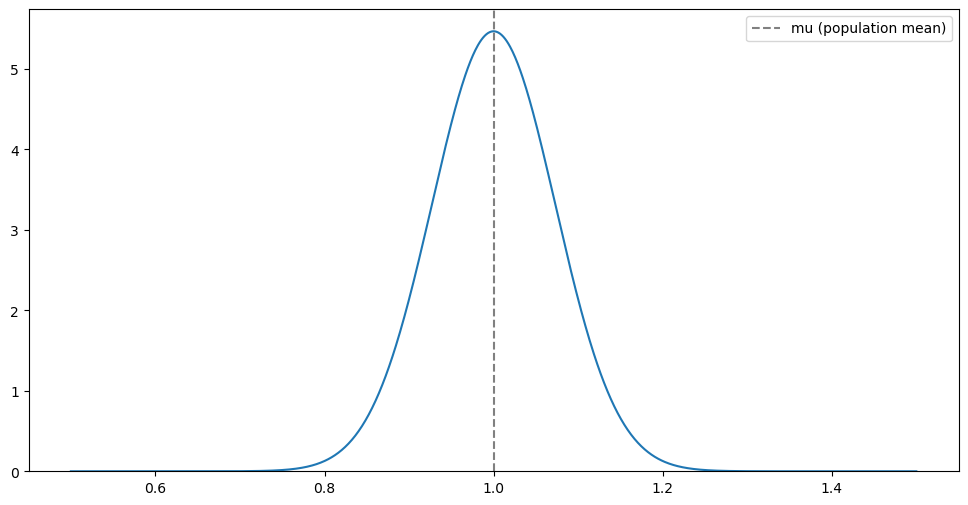

In [16]:
#@title Normal Distribution
plt.figure(figsize=(12,6))

# Create a linear space from -0.5 to 1.5 with 1000 intervals for our x-axis.
xt = np.linspace(0.5,1.5,1000)

# Plot t-distributions with different degrees of freedom.
plt.plot(xt, norm.pdf(xt,loc=mu,scale=sem))

#vertical line for pop mean
plt.axvline(x = mu,
           color='gray',
           linestyle="--",
           label="mu (population mean)"
          )

# Set y axis to start at 0
plt.ylim(bottom=0)

plt.legend()
plt.show()

Before moving onto the next step of the experiment, one avid researcher pointed out how the CLT states that the sampling distribution is "approximately" normal, not "perfectly" normal. There were several unknown parameters (e.g. the standard deviation of the population) which added uncertainty to the distribution they just plotted. A new tool was needed: t-distributions.

T-distributions are an essential tool in statistical analysis, as they account for the uncertainty of not knowing the population standard deviation. In contrast to normal distributions, t-distributions are wider and flatter. The shape of a t-distribution is determined by its degrees of freedom, which is the number of independent observations in a sample minus one. When the degrees of freedom increase, the t-distribution approaches a normal distribution, but when they are small, the tails of the distribution are fatter.

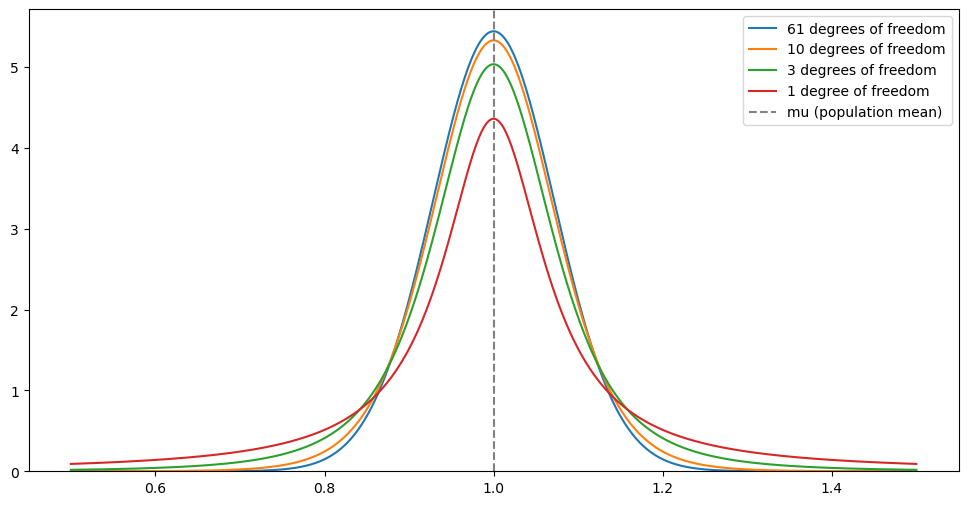

In [17]:
#@title t-distributions with different degrees of freedom
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(0.5,1.5,1000)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, t.pdf(xt,loc=mu,scale=sem,df=61), label="61 degrees of freedom")
plt.plot(xt, t.pdf(xt,loc=mu,scale=sem,df=10), label="10 degrees of freedom")
plt.plot(xt, t.pdf(xt,loc=mu,scale=sem,df=3), label="3 degrees of freedom")
plt.plot(xt, t.pdf(xt,loc=mu,scale=sem,df=1), label="1 degree of freedom")

#vertical line for pop mean
plt.axvline(x = mu,
           color='gray',
           linestyle="--",
           label="mu (population mean)"
          )


# Set y axis to start at 0
plt.ylim(bottom=0)

plt.legend()
plt.show()

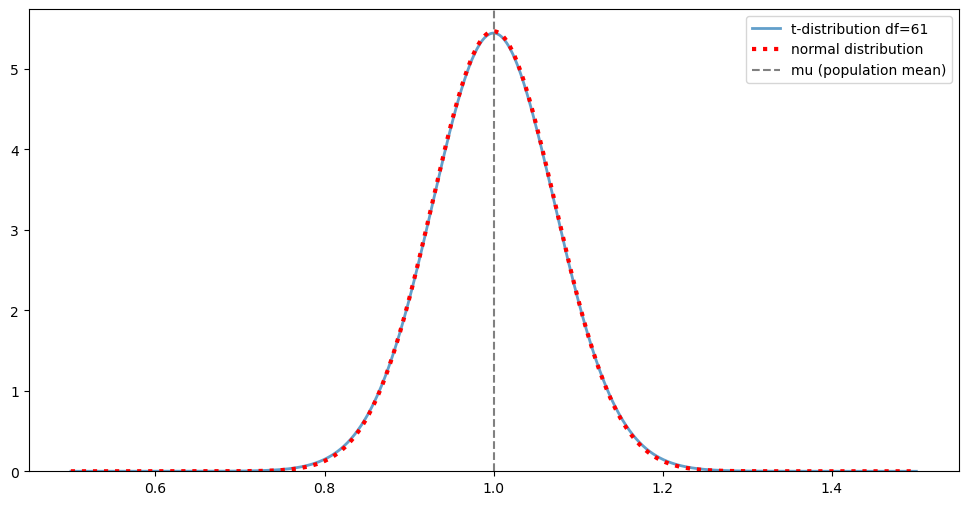

In [18]:
#@title Normal vs t-distribution (with 61 degrees of freedom)
# Plot the probability density function of a t-distribution with 61 degrees of freedom.
degrees_of_freedom = n - 1
# Compare it to a normal distribution.
plt.figure(figsize=(12,6))

# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,loc=mu,scale=sem,df=degrees_of_freedom), lw=2, alpha=0.7, label="t-distribution df=61")

# Plot a normal distribution.
plt.plot(xt, norm.pdf(xt,loc=mu,scale=sem), lw=3, color="red", linestyle="dotted", label="normal distribution")

# Set y axis to start at 0
plt.ylim(bottom=0)

#vertical line for pop mean
plt.axvline(x = mu,
           color='gray',
           linestyle="--",
           label="mu (population mean)"
          )

plt.legend()
plt.show()

Let's now go back to the t-score the researchers found (1.45). It represents the number of standard errors the sample mean is away from the population mean. Let's see where the researchers t-score is positioned on the sampling distribution:

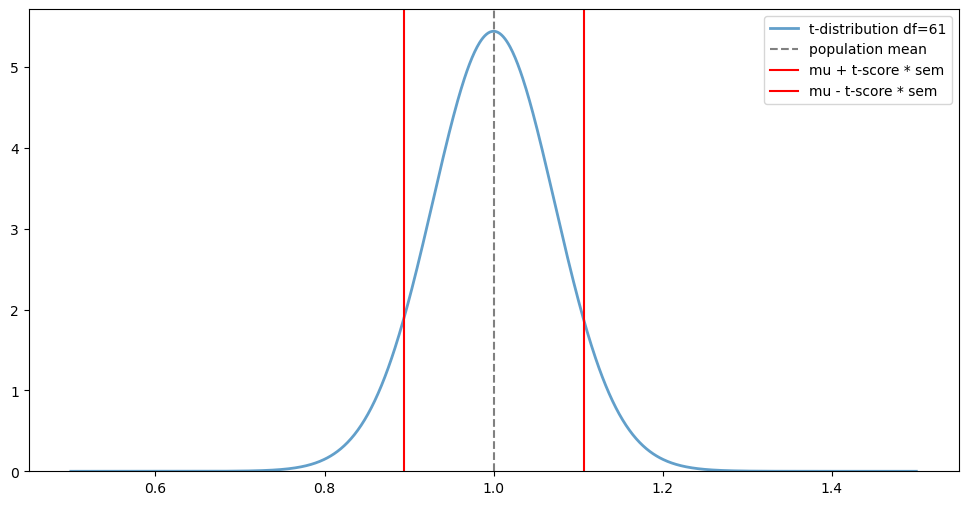

In [19]:
#@title The t-score
plt.figure(figsize=(12,6))
# Calculate the degrees of freedom
degrees_of_freedom = n - 1
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,loc=mu,scale=sem,df=degrees_of_freedom), lw=2, alpha=0.7, label="t-distribution df=61")

#vertical line for pop mean
plt.axvline(x = mu,
           color='gray',
           linestyle="--",
           label="population mean"
          )

# Add a vertical line for the t-score.
plt.axvline(x=mu+t_score*sem, color="red", label="mu + t-score * sem")
plt.axvline(x=mu-t_score*sem, color="red", label="mu - t-score * sem")

# Set y axis to start at 0
plt.ylim(bottom=0)

plt.legend()
plt.show()

As you can see, the red line on the left of the distribution is located at x=0.89, our sample mean. The red line on the right is located symmetrically on the other side of the population mean (x=1.11). In both cases, the distance from the population mean to the red lines is SEM * t-score, or 0.073 * 1.45.

### Finding the critical value

The researchers have already calculated the t-score for their squirrel weight data and now need to determine how this corresponds to their alpha value. To do this, they could use a t-distribution table to look up the critical values associated with a certain level of alpha. A critical value is a threshold used to determine whether to accept or reject the null hypothesis.

To determine the critical value for their hypothesis test, the researchers used a table. They first identified the type of test and alpha value in the table's header:
- They're performing a two tailed test.
- Their alpha is 0.01

Next, they located the appropriate row in the column that corresponded to the degrees of freedom for their test statistic's distribution, which in this case was 61.

It's worth noting that the critical value listed in the table will only be an approximation for this hypothesis test, since the table only provides values for up to 60 degrees of freedom. Since the researchers' test has 61 degrees of freedom, they will need to estimate the critical value based on the closest value in the table and account for any potential margin of error in their calculations.

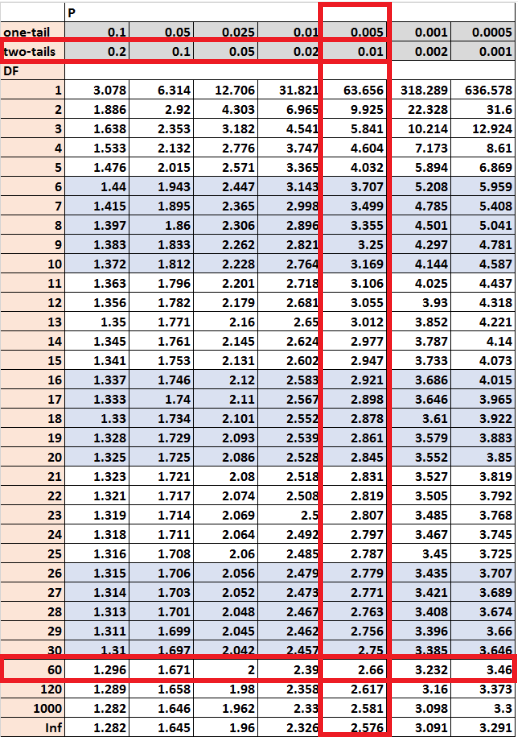

To determine whether the researchers' t-score is statistically significant, they need to compare it to the critical value associated with their chosen level of alpha. In this case, they have chosen an alpha of 0.01 and a two-tailed test, so they need two critical values.

Since the t-distribution is symmetrical, the critical values are also symmetrical. As an approximation, they use the critical value of 2.65. This means that if their t-score is greater than 2.65 or less than -2.65, they can reject the null hypothesis and conclude that the weight of the squirrels they weighed is statistically significant. In other words, the difference between the average weight of the squirrels they weighed and the average weight of all squirrels in the park is unlikely to have occurred by chance alone.

In [20]:
critical_value = 2.65

In [21]:
t_score

-1.4590109548835126

In [22]:
if abs(t_score) > abs(critical_value):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


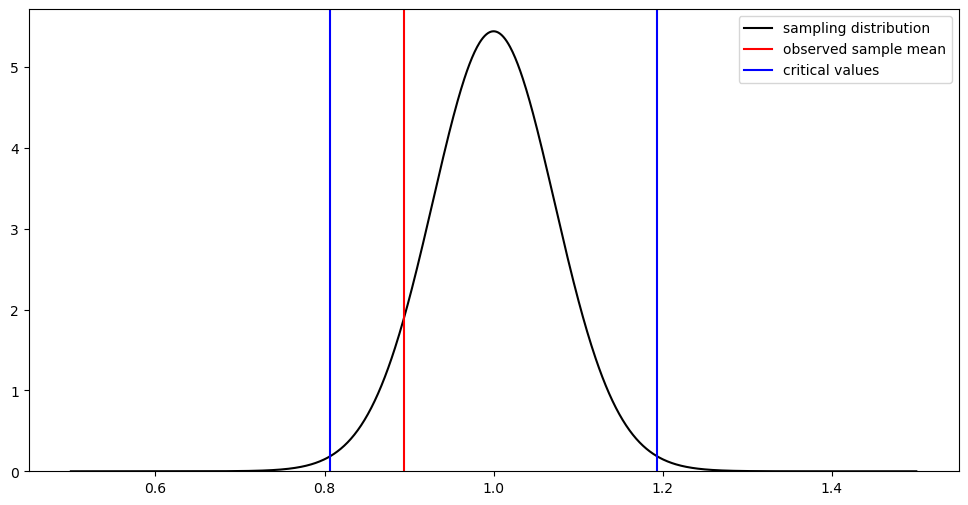

In [25]:
#@title t-distribution, t-score and critical values
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,loc=mu,scale=sem,df=degrees_of_freedom), color="black", label="sampling distribution")

# Add a vertical line for the t-score.
# plt.axvline(x=mu+t_score*sem, color="red", label="observed sample mean")
plt.axvline(x=x_bar, color="red", label="observed sample mean")

# Add vertical lines for the critical values.
plt.axvline(mu-critical_value*sem, color="blue", label="critical values")
plt.axvline(mu+critical_value*sem, color="blue")

# Set y axis to start at 0
plt.ylim(bottom=0)

plt.legend()
plt.show()

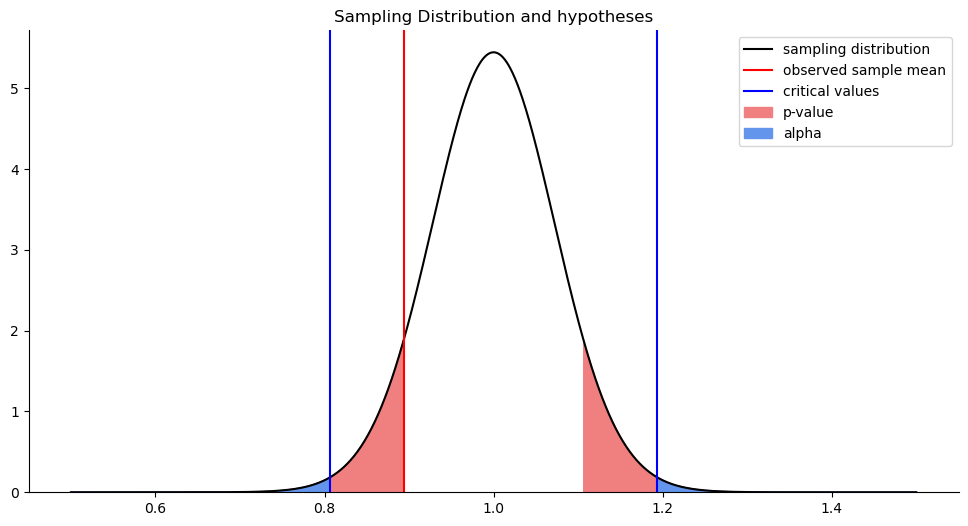

In [24]:
# @title Sampling Distribution and hypotheses
# Create a figure.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the t-distribution.
ax.plot(xt, t.pdf(xt, loc=mu, scale=sem, df=degrees_of_freedom), color="black", label="sampling distribution")

# Add a vertical line for the observed sample mean.
# plt.axvline(x=mu+t_score*sem, color="red", label="observed sample mean")
plt.axvline(x=x_bar, color="red", label="observed sample mean")

# Add vertical lines for the critical values.
ax.axvline(mu - critical_value * sem, color="blue", label="critical values")
ax.axvline(mu + critical_value * sem, color="blue")

# Set y axis to start at 0.
ax.set_ylim(bottom=0)

# Shade the area under the curve for values to the left of the observed sample mean.
ax.fill_between(xt,
                 t.pdf(xt, loc=mu, scale=sem, df=degrees_of_freedom),
                 where=(xt < mu + t_score * sem)|(xt > mu - t_score * sem),
                 color="lightcoral", label="p-value")

# Shade the area under the curve for values more extreme than +/-2.65 (= alpha).
ax.fill_between(xt,
                 t.pdf(xt,loc=mu,scale=sem,df=degrees_of_freedom),
                 where=(mu-critical_value*sem>xt)|(xt>mu+critical_value*sem),
                 color= "cornflowerblue", label="alpha")

# Add a legend.
ax.legend()

# Despine the plot.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a title.
ax.set_title('Sampling Distribution and hypotheses')

# Show the plot.
plt.show()

Since the calculated t-score of the squirrel weight data is not more extreme than the critical values of -2.65 and 2.65, the researchers can conclude that the test statistic is not in the critical region. This means that they do not have enough evidence to reject the null hypothesis.

This does not necessarily mean that the squirrels in the sample are at an 'ideal' weight or that all the squirrels in the park weigh exactly 1 kg. Instead, it suggests that the difference observed between the sample mean and 1 kg could very well be due to random chance. It's also worth mentioning that this lack of statistical significance does not rule out the possibility of a meaningful difference in a practical or biological sense – it just means that any difference detected in this sample is not statistically significant. Further research, potentially with larger samples, might be needed to draw more definitive conclusions.

# II. The coders approach

The faster way is to use [scipy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) to perform 1-sample t-tests.

In [33]:
tscore, pvalue = ttest_1samp(a = squirrels, popmean= 1, alternative='two-sided')

In [34]:
tscore

-1.459010954883512

In [35]:
pvalue

0.14969253082162412

In [36]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is larger than alpha.


Does this mean that the researchers should reject the Null Hypothesis - or not?

Since the p-value is larger than the alpha, they **do not reject the Null Hypothesis.**

# III. Challenges

## Exercise 1: the manual approach

In order to investigate further, the researchers have collected another group of squirrels from a neighboring forest. Their research partner has gathered sample weights and we want to determine if these squirrels are statistically different from the average 1kg squirrel **using the manual approach**.

In [ ]:
import pandas as pd

squirrels_2 = pd.Series([0.7 , 1.13, 0.64, 1.02, 1.19, 0.84, 0.67, 1.06, 0.74,
                         0.74, 1.07, 1.08, 1.02, 0.86, 0.76, 1.06, 0.81, 1.23,
                         1.06, 0.82, 1.09, 1.04, 1.06, 0.86, 1.27, 0.82, 0.54,
                         0.68, 1.11, 0.72, 0.73, 0.6 , 0.94, 1.26, 0.94, 1.19,
                         1.03, 1.01, 0.85, 0.59, 0.88, 0.49, 1.06, 0.76, 1.14,
                         0.47, 0.63, 0.92, 0.65, 1.42, 1.12, 1.03, 0.71])

### 1.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

The null hypothesis is that the weight of squirells in the neighboring forest is 1 kg.
The alternative hypothesis is that the weight of squirells in the neighboring forest is not 1 kg.

### 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

In [21]:
alpha = 0.01
squirrels_2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 53 entries, 0 to 52
Series name: None
Non-Null Count  Dtype  
--------------  -----  
53 non-null     float64
dtypes: float64(1)
memory usage: 556.0 bytes


### 3.&nbsp; Collect data that is random and independent

In [17]:
squirrels_2_mu = 1
squirrels_2_xbar = squirrels_2.mean()
squirrels_2_std = squirrels_2.std()
squirrels_2_n = len(squirrels_2)
squirrels_2_sem = squirrels_2_std / (squirrels_2_n ** 0.5)

### 4.&nbsp; Calculate the test result

In [18]:
t_score = (squirrels_2_xbar - squirrels_2_mu) / squirrels_2_sem
t_score

# choco_upper_boundary_95 = choco_mean + (1.96 * choco_std_err)
# choco_lower_boundary_95 = choco_mean - (1.96 * choco_std_err)

-3.0222502237975024

### 5.&nbsp; Interpret the test result

The critical values can be found on the table earlier in the notebook. We need to look for a two-sided test, alpha = 0.01, and the degrees of freedom is 52. We can therefore estimate the critical values to be 2.69 and -2.69.

In [23]:
critical_value = 2.673734   # for alpha 0.01 - so which one?
critical_value = 2.69       # for alpha 0.01
if abs(t_score) > critical_value:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We reject the null hypothesis


## Exercise 2: the coders approach

To assess whether students from WBSCS (WBS CODING SCHOOL) exhibit higher intelligence compared to the general population, an experiment was conducted. A random sample of 45 WBSCS students was selected, and an IQ test was administered, yielding an average score of 130. In contrast, the average IQ score for the general population is 100.

To determine if this disparity in IQ scores is statistically significant and indicative of WBSCS students being potentially smarter than the regular population, a hypothesis test needs to be performed **using the coders approach**.

In [31]:
import pandas as pd

wbscs_students = [172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73,
 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108,
 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116,
 182, 144, 127, 216, 71, 200, 182, 71, 129]

### 1.&nbsp; Define the Null and the Alternative Hypotheses.

The null hypothesis is that the intelligence of WBSCS students is not higher than that the of the general population (100).
The alternative hypothesis is that the intelligence of WBSCS students is higher than that of the general population.

### 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

In [ ]:
alpha = 0.01

### 3.&nbsp; Collect data that is random and independent

In [34]:
pd.Series(wbscs_students).sample(3)

38    127
15    213
9     155
dtype: int64

### 4.&nbsp; Calculate the test result

In [37]:
from scipy.stats import t, norm, ttest_1samp
tscore, pvalue = ttest_1samp(a = wbscs_students, popmean= 100, alternative='greater')

### 5.&nbsp; Interpret the test result

In [38]:
if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
